In [2]:
# Naložimo knjižnjice in funkcije
from sage.all import graphs
from metahevristika import simulated_annealing_subpath
import csv
import time
import os
import pandas as pd
import matplotlib.pyplot as plt
from funkcije2 import Ln_graph, build_caterpillar, build_caterpillar2, subpath_number, cubic_graphs, encode_time_hms, build_tree, show_build_tree_tree_layout, spanning_tree, tree_layout_positions_from_tree

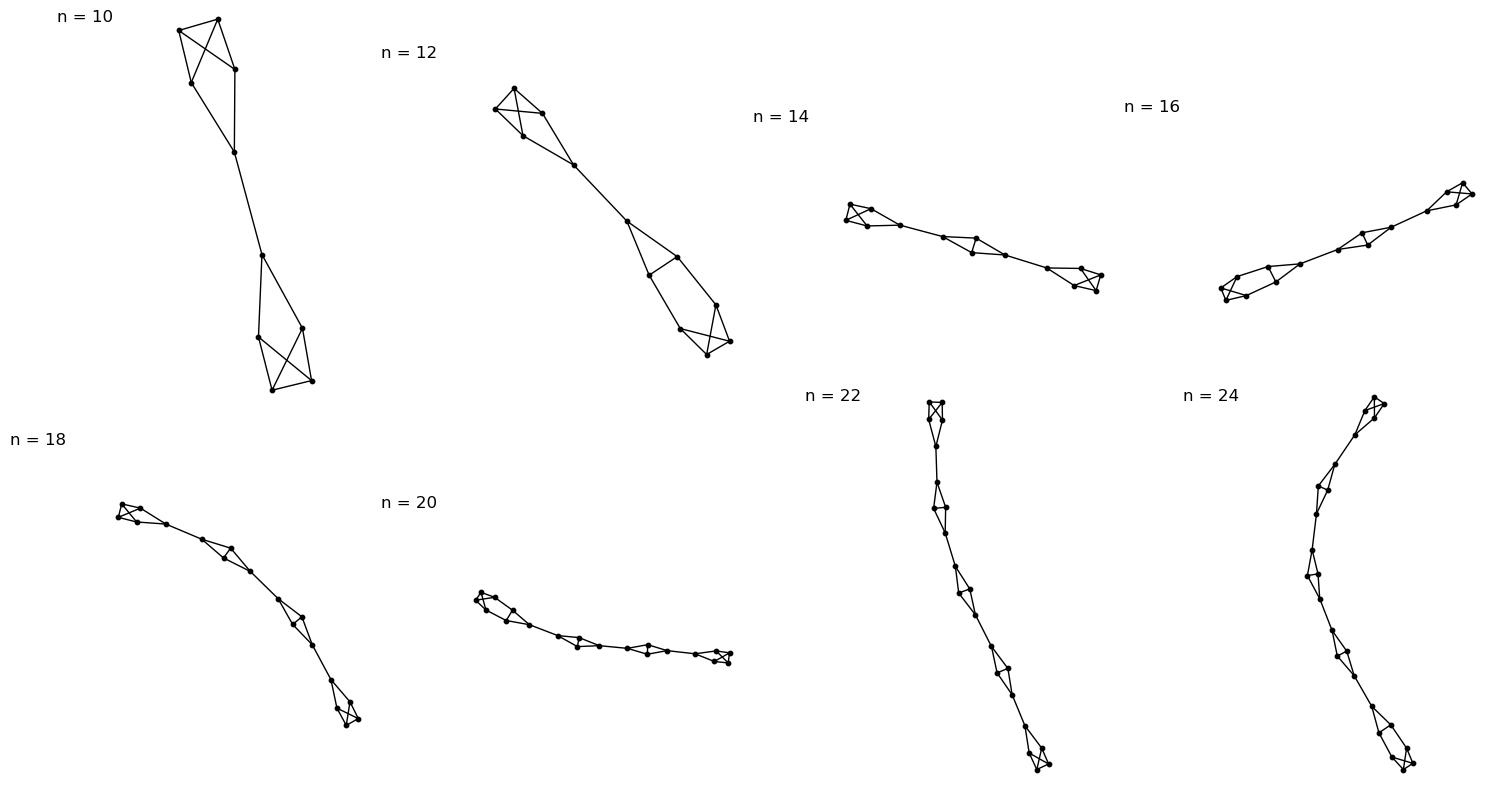

In [12]:
# Preizkusimo funkcijo Ln_graphs

Ln_plots = []
for n in range(10, 27, 2):
    # narisan graf
    Gplot = Ln_graph(n).plot(
        layout="spring",
        vertex_size=10,
        vertex_color="black",
        vertex_labels=False,
        edge_thickness=1,
        iterations=200
    )

    # izklopimo osi, da so grafi čisti
    Gplot.axes(False)
    # naslov nad grafom (v relativnih koordinatah figure)
    title = text(
        f"n = {n}",
        (0.5, 1),
        horizontal_alignment='center',
        color='black',
        fontsize=12
    )
    Ln_plots.append(Gplot + title)

row1 = Ln_plots[:4]
row2 = Ln_plots[4:8]

GA = graphics_array([row1, row2])
GA.show(figsize=(15, 8), axes=False)

In [ ]:
# Preverimo koliko je vseh kubičnih grafov za vsak n
# NE POGANJAJ ZNOVA: Trajalo je 110min
for n in range(4,23,2):
    c = sum(1 for _ in cubic_graphs(n))
    print(f"n={n} število grafov: {c}")

n=4 število grafov: 1
n=6 število grafov: 2
n=8 število grafov: 5
n=10 število grafov: 19
n=12 število grafov: 85
n=14 število grafov: 509
n=16 število grafov: 4060
n=18 število grafov: 41301
n=20 število grafov: 510489
n=22 število grafov: 7319447


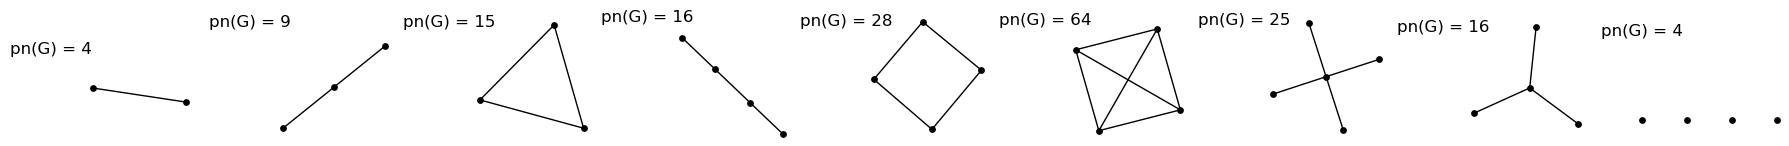

In [3]:
# preverjamo delovanje funkcije subpath_number na enostavnih grafih
graphs_list = [
    # 2. P2: pot s 2 vozlišči
    Graph({0:[1]}),
    # 3. Zvezda S3: center 0, listi 1 in 2
    Graph({0:[1,2]}),
    # 3. C3: trikotnik
    Graph({0:[1,2], 1:[2]}),
    # 4. Potni graf P4
    Graph({0:[1], 1:[2], 2:[3]}),
    # 4. Cikel C4
    Graph({0:[1,3], 1:[2], 2:[3]}),
    # 4. Popoln graf K4
    graphs.CompleteGraph(4),
    # 4. Zvezda S4
    graphs.StarGraph(4),
    # 4. Drevo v obliki črke T
    Graph({0:[1,2,3]}),
    # 4. Diskretni graf na 4 vozliščih
    Graph(4)
]

plots = []
for G in graphs_list:
    # narisan graf
    Gplot = G.plot(
        layout="spring",
        vertex_size=15,
        vertex_color="black",
        vertex_labels=False,
        edge_thickness=1,
        iterations=200
    )

    # izklopimo osi, da so grafi čisti
    Gplot.axes(False)
    # naslov nad grafom (v relativnih koordinatah figure)
    title = text(
        f"pn(G) = {subpath_number(G)}",
        (0.5, 1),
        horizontal_alignment='center',
        color='black',
        fontsize=12
    )
    plots.append(Gplot + title)

# prikaz v eni vrstici
graphics_array([plots]).show(figsize=(18,3), axes=False)

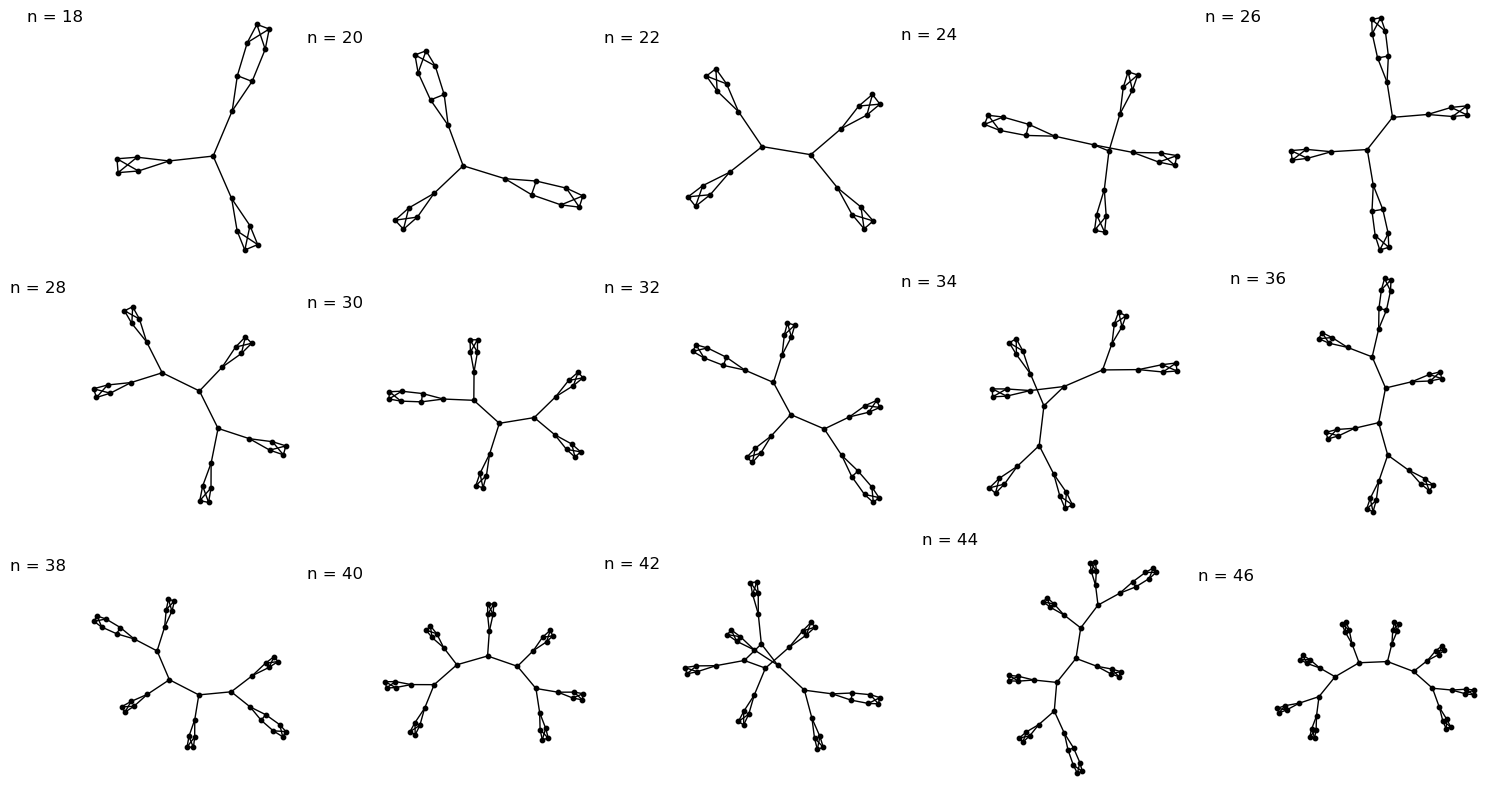

In [11]:
# Preizkusimo funkcijo build_caterpillar

star_plots = []
for n in range(18, 47, 2):
    # narisan graf
    Gplot = build_caterpillar(n).plot(
        layout="spring",
        vertex_size=10,
        vertex_color="black",
        vertex_labels=False,
        edge_thickness=1,
        iterations=400
    )

    # izklopimo osi, da so grafi čisti
    Gplot.axes(False)
    # naslov nad grafom (v relativnih koordinatah figure)
    title = text(
        f"n = {n}",
        (0.5, 1),
        horizontal_alignment='center',
        color='black',
        fontsize=12
    )
    star_plots.append(Gplot + title)

row1 = star_plots[:5]
row2 = star_plots[5:10]
row3 = star_plots[10:15]

GA = graphics_array([row1, row2, row3])
GA.show(figsize=(15, 8), axes=False)

## Prva točka

Tu je cilj preveriti pravilnost trditve za čim večje n, kjer Ln **primerjamo z vsemi možnimi kubičnimi grafi** na n vozliščih

Shranili bomo:

        - CSV boljših grafov od Ln

Za csv n = 16 je trajalo 1,5 min (4060 grafov), za n = 18: 80 min (41301 grafov) -> **za n = 20 je 510489 grafov**

In [10]:
start_time = time.time()

os.makedirs("Data", exist_ok=True)

for n in range(10, 19, 2):
    file_n = os.path.join("Data", f"boljsi_Ln_n{n}.csv")

    # VAROVALO: če datoteka že obstaja, je ne povozi in preskoči n
    if os.path.exists(file_n):
        print(f"Preskok n = {n} | datoteka že obstaja: {file_n}")
        continue
        
    start = time.time()

    # Ustvari/odpri CSV za trenutni n
    with open(file_n, mode="w", newline="") as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow(["n", "graph6", "pn(G)", "pn(Ln)", "pn(star)"])

        Ln = Ln_graph(n)
        pn = subpath_number(Ln)
        star = build_catterpillar(n)
        pn2 = subpath_number(star)


        written = 0 

        for G in cubic_graphs(n):
            pnG = subpath_number(G)
            if pnG < pn:
                writer.writerow([n, G.graph6_string(), pnG, pn, pn2])
                written += 1

    elapsed_total = time.time() - start_time
    end = time.time() - start

    print(f"Zaključil n = {n} | datoteka: {file_n} | zapisov: {written+1} | čas n: {encode_time_hms(end)} | skupni: {encode_time_hms(elapsed_total)}")


Preskok n = 10 | datoteka že obstaja: Data/boljsi_Ln_n10.csv
Preskok n = 12 | datoteka že obstaja: Data/boljsi_Ln_n12.csv
Preskok n = 14 | datoteka že obstaja: Data/boljsi_Ln_n14.csv
Preskok n = 16 | datoteka že obstaja: Data/boljsi_Ln_n16.csv
Preskok n = 18 | datoteka že obstaja: Data/boljsi_Ln_n18.csv


In [35]:
# Probamo najti en protiprimer za caterpillar graf za n = 20
n = 20
G = build_caterpillar2(n)
pnG = subpath_number(G)
count = 0
start = time.time()
nasel = False
print(f"Primerjamo s pn(Cat2) = {pnG}")
    
for H in cubic_graphs(n):
    count += 1
    pnH = subpath_number(H)
    if pnH < pnG:
        print(f"Našel boljši graf za n = {n} | pn(H) = {pnH}!",
              f"Šel sem čez {count} grafov")
        H.show(
            vertex_size=10,
            vertex_color="black",
            vertex_labels=False,
            edge_thickness=1,
            figsize=[3, 3],
            iterations=400
        )
        nasel = True
        break

    if count % 10000 == 0:
        elapsed = time.time() - start
        print(f"Obdelal: {count} grafov v {encode_time_hms(elapsed)}")

if not nasel:
    print("Boljšega grafa ni!")


Primerjamo s pn(Cat2) = 11708
Obdelal: 10000 grafov v 00:07:06.221
Obdelal: 20000 grafov v 00:14:27.648
Obdelal: 30000 grafov v 00:22:14.628
Obdelal: 40000 grafov v 00:29:35.814
Obdelal: 50000 grafov v 00:35:44.268
Obdelal: 60000 grafov v 00:42:34.081
Obdelal: 70000 grafov v 00:49:09.584
Obdelal: 80000 grafov v 00:56:37.978
Obdelal: 90000 grafov v 01:04:05.114
Obdelal: 100000 grafov v 01:10:53.640
Obdelal: 110000 grafov v 01:18:30.326
Obdelal: 120000 grafov v 01:25:39.490
Obdelal: 130000 grafov v 01:32:43.527
Obdelal: 140000 grafov v 01:39:43.527
Obdelal: 150000 grafov v 01:46:13.215
Obdelal: 160000 grafov v 01:52:35.768
Obdelal: 170000 grafov v 01:58:02.642
Obdelal: 180000 grafov v 02:04:41.769
Obdelal: 190000 grafov v 02:11:30.471
Obdelal: 200000 grafov v 02:17:39.008
Obdelal: 210000 grafov v 02:23:39.574
Obdelal: 220000 grafov v 02:30:03.610
Obdelal: 230000 grafov v 02:36:50.532
Obdelal: 240000 grafov v 02:43:48.752
Obdelal: 250000 grafov v 02:51:34.025
Obdelal: 260000 grafov v 02:5

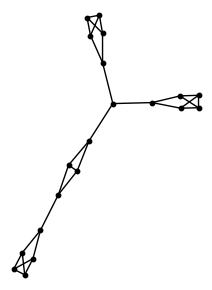

In [4]:
build_caterpillar2(20).show(
            vertex_size=10,
            vertex_color="black",
            vertex_labels=False,
            edge_thickness=1,
            figsize=[3, 3],
            iterations=400
        )

In [36]:
folder = "Data"
dfs = []

for file in os.listdir(folder):
    if file.lower().startswith("boljsi_"):
        path = os.path.join(folder, file)
        df = pd.read_csv(path)
        df["source_file"] = file  # dodamo informacijo, iz katere datoteke prihaja
        dfs.append(df)

df = pd.concat(dfs, ignore_index=True) if dfs else pd.DataFrame()

In [37]:
df_f = df[df["n"] == 18].copy()
df_f = df_f.sort_values("pn(G)")
df_min3 = df_f.head(int(3))
slov = dict(zip(df_min3["graph6"], df_min3["pn(G)"]))

for G6, pn in slov.items():
    G = Graph(G6)
    print(pn)

7072
7296
7380


## Simulated annealing

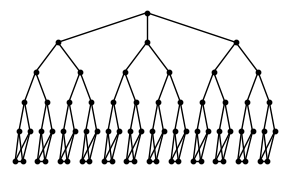

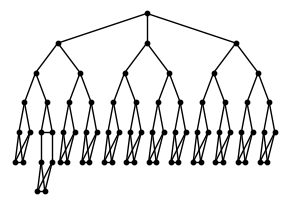

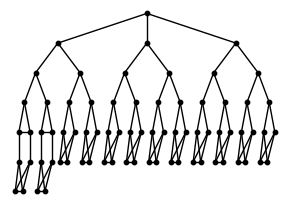

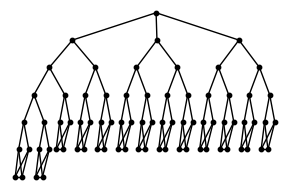

In [7]:
for n in range(70, 77, 2):
    show_build_tree_tree_layout(n, root=0, figsize=[3,3])

In [5]:
for n in range(16, 41, 2):
    Ln = Ln_graph(n)
    T = build_tree(n)
    C1 = build_caterpillar(n)
    C2 = build_caterpillar2(n)
    pnLn = subpath_number(Ln)
    pnT = subpath_number(T)
    pnC1 = subpath_number(C1)
    pnC2 = subpath_number(C2)

    print(f"n = {n} | pn(Ln) = {pnLn} | pn(Tree) = {pnT} | pn(Cat1) = {pnC1} | pn(Cat2) = {pnC2}")

n = 16 | pn(Ln) = 12744 | pn(Tree) = 3640 | pn(Cat1) = 3640 | pn(Cat2) = 3640
n = 18 | pn(Ln) = 22532 | pn(Tree) = 7072 | pn(Cat1) = 7072 | pn(Cat2) = 7072
n = 20 | pn(Ln) = 51532 | pn(Tree) = 12816 | pn(Cat1) = 12816 | pn(Cat2) = 11708
n = 22 | pn(Ln) = 90760 | pn(Tree) = 7156 | pn(Cat1) = 7156 | pn(Cat2) = 7156
n = 24 | pn(Ln) = 206800 | pn(Tree) = 12220 | pn(Cat1) = 12220 | pn(Cat2) = 12220
n = 26 | pn(Ln) = 363788 | pn(Tree) = 19596 | pn(Cat1) = 19596 | pn(Cat2) = 19064
n = 28 | pn(Ln) = 827988 | pn(Tree) = 11824 | pn(Cat1) = 11824 | pn(Cat2) = 11824
n = 30 | pn(Ln) = 1456016 | pn(Tree) = 18520 | pn(Cat1) = 18520 | pn(Cat2) = 18520
n = 32 | pn(Ln) = 3312856 | pn(Tree) = 27528 | pn(Cat1) = 27528 | pn(Cat2) = 27572
n = 34 | pn(Ln) = 5825044 | pn(Tree) = 17644 | pn(Cat1) = 17644 | pn(Cat2) = 17644
n = 36 | pn(Ln) = 13252444 | pn(Tree) = 25972 | pn(Cat1) = 25972 | pn(Cat2) = 25972
n = 38 | pn(Ln) = 23301272 | pn(Tree) = 36612 | pn(Cat1) = 36612 | pn(Cat2) = 37232
n = 40 | pn(Ln) = 5301

In [75]:
for n in range(10,21, 2):
    Ln = Ln_graph(n)
    C1 = build_caterpillar(n)
    C2 = build_caterpillar2(n)
    pnLn = subpath_number(Ln)
    pnC1 = subpath_number(C1)
    pnC2 = subpath_number(C2)

    print(f"n = {n} | pn(Ln) = {pnLn} | pn(Cat1) = {pnC1} | pn(Cat2) = {pnC2}")

n = 10 | pn(Ln) = 1276 | pn(Cat1) = 1276 | pn(Cat2) = 1276
n = 12 | pn(Ln) = 3076 | pn(Cat1) = 3076 | pn(Cat2) = 3076
n = 14 | pn(Ln) = 5504 | pn(Cat1) = 7188 | pn(Cat2) = 5504
n = 16 | pn(Ln) = 12744 | pn(Cat1) = 3640 | pn(Cat2) = 3640
n = 18 | pn(Ln) = 22532 | pn(Cat1) = 7072 | pn(Cat2) = 7072
n = 20 | pn(Ln) = 51532 | pn(Cat1) = 12816 | pn(Cat2) = 11708



=== ZAČENJAM n = 20 ===
[AUTO] mean_dE=17552.96, T0=25323.57, T_end=200.00, alpha=0.999758
Korak 2000, T=15605.4169, E=156212, best_E=38116, sprejetih slabših = 426/1494 (28.51 %)
Korak 4000, T=9616.6960, E=25732, best_E=14012, sprejetih slabših = 277/1646 (16.83 %)
Korak 6000, T=5926.2013, E=25632, best_E=12768, sprejetih slabših = 131/1762 (7.43 %)
Korak 8000, T=3651.9676, E=11708, best_E=11708, sprejetih slabših = 89/1802 (4.94 %)
Korak 10000, T=2250.4918, E=14212, best_E=11708, sprejetih slabših = 77/1802 (4.27 %)
Korak 12000, T=1386.8451, E=12768, best_E=11708, sprejetih slabših = 82/1821 (4.50 %)
Korak 14000, T=854.6306, E=11708, best_E=11708, sprejetih slabših = 48/1834 (2.62 %)
Korak 16000, T=526.6583, E=14212, best_E=11708, sprejetih slabših = 18/1867 (0.96 %)
Korak 18000, T=324.5484, E=11708, best_E=11708, sprejetih slabših = 3/1854 (0.16 %)
Korak 20000, T=200.0000, E=11708, best_E=11708, sprejetih slabših = 2/1881 (0.11 %)
Zaključil n=20 | pn(C1)=12816 | Best_E=11708 | čas=

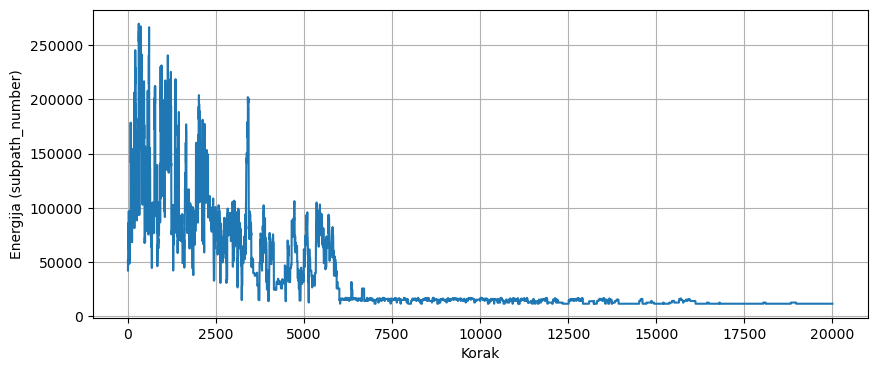

In [81]:
for n in range(20, 21, 2):

    print(f"\n=== ZAČENJAM n = {n} ===")

    Ln = Ln_graph(n)
    pnLn = subpath_number(Ln)
    C1 = build_caterpillar(n)
    pnC1 = subpath_number(C1)
    pnC2 = subpath_number(build_caterpillar2(n))
    if n >= 16:
        pnT = subpath_number(build_tree(n))
    else:
        pnT = None

    start = time.time()
    best_G, best_E, history = simulated_annealing_subpath(
        Ln,
        steps=20000,
        max_tries=1000,
        T_end_target=200,
        verbose=True
    )
    elapsed = time.time() - start

    print(f"Zaključil n={n} | pn(C1)={pnC1} | Best_E={best_E} | čas={encode_time_hms(elapsed)}s")
    plt.figure(figsize=(10, 4))
    plt.plot(history)
    plt.xlabel("Korak")
    plt.ylabel("Energija (subpath_number)")
    #plt.title(f"n = {n} | Potek energije med simulated annealing")
    plt.grid(True)
    plt.show()


In [18]:
folder = "Data"

file = "SA_results.csv"
path = os.path.join(folder, file)
df = pd.read_csv(path)
grafi = df["best_G"].tolist()
df

,n,best_G,best_pn,pn(Ln),pn(caterpillar),pn(caterpillar2),pn(tree)
0,10,I^o??KFB_,1276,1276,1276,1276,NaN
1,12,K^o??KF@?C`B,3076,3076,3076,3076,NaN
2,14,M^oG?KF????B?F?e?,5504,5504,7188,5504,NaN
3,16,O?O?i?HgD?F?_E@_GK?gA,3640,12744,3640,3640,3640.0
4,18,QC?_HDGC?O?w_COA@@H?_c?`?_O,7072,22532,7072,7072,7072.0
5,20,SAC_??@?YKCc?_a?Y???CGS?A?O?CkOA?,12816,51532,12816,11708,12816.0
6,22,UGA?_P?W?A?OC`?Q?_???GKA??sG@?P?_OCOAAO?,7156,90760,7156,7156,7156.0
7,24,WK?G?C_?R?Q???B?@A?@@??`?g?E?C_??CAG??q?C_C??aG,12220,206800,12220,12220,12220.0
8,26,Y?c???AA?L???OG?g?_D??OaO?@?GA?G?@@G@C?A?@ACA?...,21760,363788,19596,19064,19596.0
9,28,[G?G_C?CO@@??I??O?CAG??G?@J????[@_??@???O??_?H...,29568,827988,11824,11824,11824.0


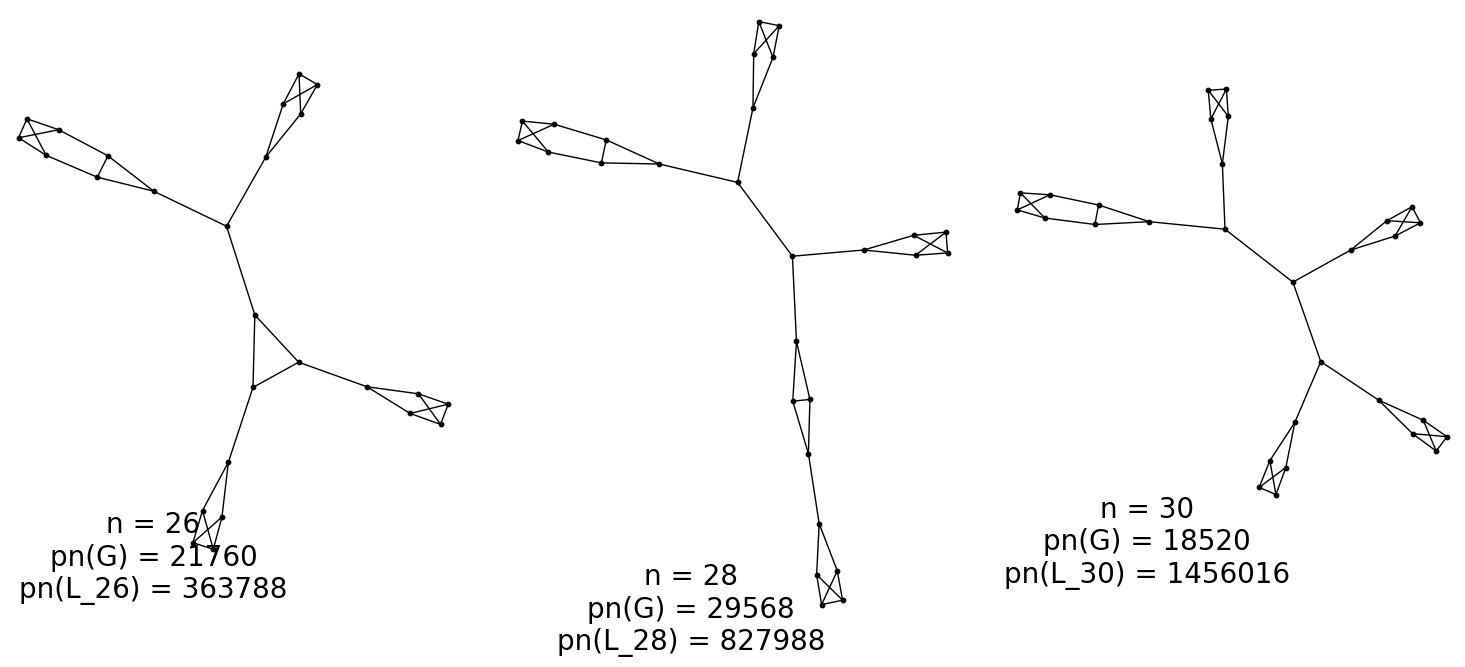

In [74]:
plots = []
for G6 in grafi[8:]:
    G = Graph(G6)
    n = G.num_verts()
    pnLn = subpath_number(Ln_graph(n))
    pnG = subpath_number(G)
    # narisan graf
    Gplot = G.plot(
        layout="spring",
        vertex_size=10,
        vertex_color="black",
        vertex_labels=False,
        edge_thickness=1,
        iterations=500
    )

    # izklopimo osi, da so grafi čisti
    Gplot.axes(False)
    # naslov nad grafom (v relativnih koordinatah figure)
    title = text(
        f"n = {n}\npn(G) = {pnG}\npn(L_{n}) = {pnLn}",
        (1.5, -1),
        horizontal_alignment='center',
        color='black',
        fontsize=20
    )
    plots.append(Gplot + title)

row1 = plots

GA = graphics_array([row1])
GA.show(figsize=(15, 8), axes=False)